In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

In [3]:
results_file = '../results/encoder-comparisons.csv'
df = pd.read_csv(results_file)

# order = ['File', 'Raw', 'RLE', 'PNG', 'CCT', 'ZIP', 'JP2']
# df = df[order]

df.head()

,File,Raw,ZIP,PNG,RLE,JP2,CCT
0,(0003)-1-001.dcm,524288,295851,263782,304698,307826,224170
1,(0004)-1-002.dcm,524288,297801,265472,304374,309471,224967
2,(0005)-1-003.dcm,524288,300580,267121,304832,311475,226024
3,(0006)-1-004.dcm,524288,301763,268408,303902,312502,226337
4,(0007)-1-005.dcm,524288,301356,268897,303304,312964,226024


In [4]:
colors = ['grey', 'grey', 'grey', 'grey', 'grey', 'green']
# colors = ['grey', 'grey', 'grey', 'green', 'grey', 'gray']

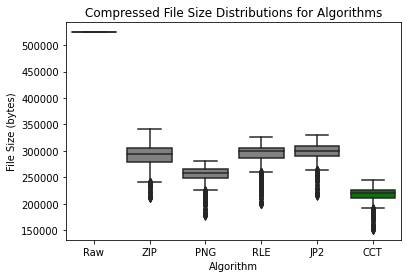

In [6]:

melt = pd.melt(df.drop('File', axis = 1))

# plt.figure(figsize = (8, 6), edgecolor = 'black')
# sns.set_context("paper", rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":20})  
sns.boxplot(x = 'variable', y = 'value', data = melt, showfliers = True, palette = colors)

plt.title('Compressed File Size Distributions for Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('File Size (bytes)')
plt.savefig('../results/figures/distribution.png', dpi = 300, bbox_inches = 'tight')


In [7]:

raw = df['Raw']
cols = df.columns[1:]

ratio_dict = {}
saved_dict = {}
total_dict = {}

for col in cols:

	ratio = raw.sum() / df[col].sum()
	saved = 100 * (1 - df[col].sum() / raw.sum())
	total = df[col].sum() / 1_000_000_000
	
	ratio_dict[col] = ratio
	saved_dict[col] = saved
	total_dict[col] = total



In [8]:
ratio = pd.DataFrame({"A": list(ratio_dict.keys()), "B": list(ratio_dict.values())})
saved = pd.DataFrame({"A": list(saved_dict.keys()), "B": list(saved_dict.values())})
total = pd.DataFrame({"A": list(total_dict.keys()), "B": list(total_dict.values())})

ratio

,A,B
0,Raw,1.000000
1,ZIP,1.805547
2,PNG,2.059297
3,RLE,1.792206
4,JP2,1.763210
5,CCT,2.421973


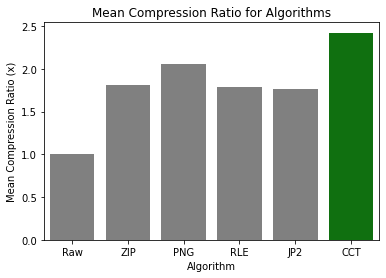

In [9]:
# plt.figure(figsize = (12, 8), edgecolor = 'black')
sns.barplot(x = 'A', y = 'B', data = ratio, palette = colors, linewidth = 2.5)
plt.title('Mean Compression Ratio for Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Mean Compression Ratio (x)')
plt.savefig('../results/figures/ratio.png', dpi = 300)

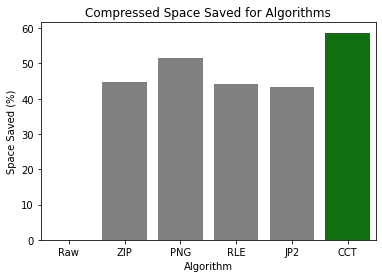

In [10]:
sns.barplot(x = 'A', y = 'B', data = saved, palette = colors)
plt.title('Compressed Space Saved for Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Space Saved (%)')
plt.savefig('../results/figures/space.png', dpi = 300)

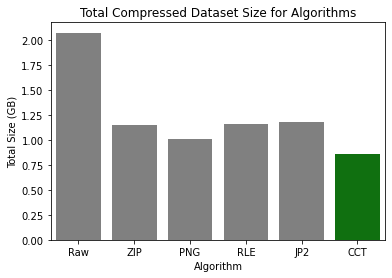

In [11]:
sns.barplot(x = 'A', y = 'B', data = total, palette = colors)
plt.title('Total Compressed Dataset Size for Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Total Size (GB)')
plt.savefig('../results/figures/totalsize.png', dpi = 300)

In [12]:
def percent_increase(start, final):
	return (final - start) / abs(start)

In [13]:
ratios = dict(zip(ratio['A'], ratio['B']))

for col in cols:
	if col == 'CCT':
		continue
	inc = percent_increase(ratios[col], ratios['CCT']) * 100
	print(f'(ratio) {col} to CCT increase: {inc:.3f}%')


(ratio) Raw to CCT increase: 142.197%
(ratio) ZIP to CCT increase: 34.141%
(ratio) PNG to CCT increase: 17.612%
(ratio) RLE to CCT increase: 35.139%
(ratio) JP2 to CCT increase: 37.362%
